Matplotlib created a temporary config/cache directory at /tmp/matplotlib-kaztp3em because the default path (/home/c1l1mo/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


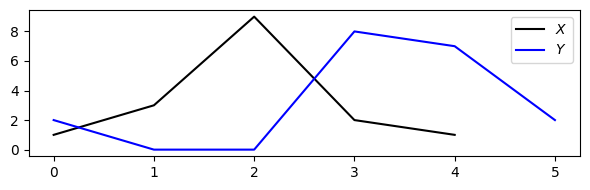

In [1]:
import numpy as np
import scipy.spatial
from numba import jit
import matplotlib.pyplot as plt
%matplotlib inline

X =  [1, 3, 9, 2, 1]
Y = [2, 0, 0, 8, 7, 2]
N = len(X)
M = len(Y)

plt.figure(figsize=(6, 2))
plt.plot(X, c='k', label='$X$')
plt.plot(Y, c='b', label='$Y$')
plt.legend()
plt.tight_layout()

In [2]:
def compute_cost_matrix(X, Y, metric='euclidean'):
    """Compute the cost matrix of two feature sequences

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        X (np.ndarray): Sequence 1
        Y (np.ndarray): Sequence 2
        metric (str): Cost metric, a valid strings for scipy.spatial.distance.cdist (Default value = 'euclidean')

    Returns:
        C (np.ndarray): Cost matrix
    """
    X, Y = np.atleast_2d(X, Y)
    C = scipy.spatial.distance.cdist(X.T, Y.T, metric=metric)
    return C

C =  compute_cost_matrix(X, Y, metric='euclidean')
print('Cost matrix C =', C, sep='\n')

Cost matrix C =
[[1. 1. 1. 7. 6. 1.]
 [1. 3. 3. 5. 4. 1.]
 [7. 9. 9. 1. 2. 7.]
 [0. 2. 2. 6. 5. 0.]
 [1. 1. 1. 7. 6. 1.]]


In [3]:
@jit(nopython=True)
def compute_accumulated_cost_matrix(C):
    """Compute the accumulated cost matrix given the cost matrix

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        C (np.ndarray): Cost matrix

    Returns:
        D (np.ndarray): Accumulated cost matrix
    """
    N = C.shape[0]
    M = C.shape[1]
    D = np.zeros((N, M))
    D[0, 0] = C[0, 0]
    for n in range(1, N):
        D[n, 0] = D[n-1, 0] + C[n, 0]
    for m in range(1, M):
        D[0, m] = D[0, m-1] + C[0, m]
    for n in range(1, N):
        for m in range(1, M):
            D[n, m] = C[n, m] + min(D[n-1, m], D[n, m-1], D[n-1, m-1])
    return D

D =  compute_accumulated_cost_matrix(C)
print('Accumulated cost matrix D =', D, sep='\n')
print('DTW distance DTW(X, Y) =', D[-1, -1])

Accumulated cost matrix D =
[[ 1.  2.  3. 10. 16. 17.]
 [ 2.  4.  5.  8. 12. 13.]
 [ 9. 11. 13.  6.  8. 15.]
 [ 9. 11. 13. 12. 11.  8.]
 [10. 10. 11. 18. 17.  9.]]
DTW distance DTW(X, Y) = 9.0


In [4]:
@jit(nopython=True)
def compute_optimal_warping_path(D):
    """Compute the warping path given an accumulated cost matrix

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        D (np.ndarray): Accumulated cost matrix

    Returns:
        P (np.ndarray): Optimal warping path
    """
    N = D.shape[0]
    M = D.shape[1]
    n = N - 1
    m = M - 1
    P = [(n, m)]
    while n > 0 or m > 0:
        if n == 0:
            cell = (0, m - 1)
        elif m == 0:
            cell = (n - 1, 0)
        else:
            val = min(D[n-1, m-1], D[n-1, m], D[n, m-1])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-1, m]:
                cell = (n-1, m)
            else:
                cell = (n, m-1)
        P.append(cell)
        (n, m) = cell
    P.reverse()
    return np.array(P)
        
P = compute_optimal_warping_path(D)
print('Optimal warping path P =', P.tolist())

Optimal warping path P = [[0, 0], [0, 1], [1, 2], [2, 3], [2, 4], [3, 5], [4, 5]]


In [5]:
c_P = sum(C[n, m] for (n, m) in P)
print('Total cost of optimal warping path:', c_P)
print('DTW distance DTW(X, Y) =', D[-1, -1])

Total cost of optimal warping path: 9.0
DTW distance DTW(X, Y) = 9.0


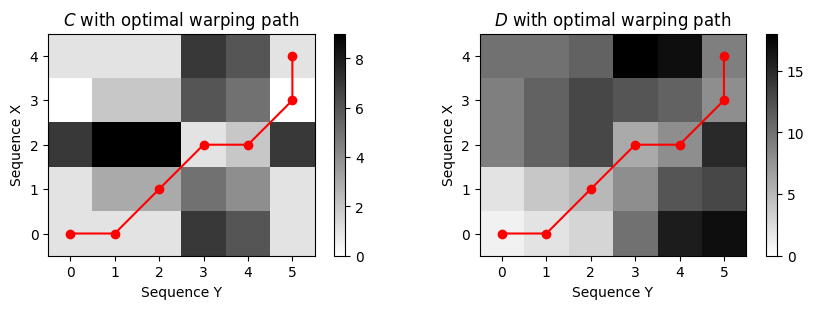

In [6]:
P = np.array(P) 
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.imshow(C, cmap='gray_r', origin='lower', aspect='equal')
plt.plot(P[:, 1], P[:, 0], marker='o', color='r')
plt.clim([0, np.max(C)])
plt.colorbar()
plt.title('$C$ with optimal warping path')
plt.xlabel('Sequence Y')
plt.ylabel('Sequence X')

plt.subplot(1, 2, 2)
plt.imshow(D, cmap='gray_r', origin='lower', aspect='equal')
plt.plot(P[:, 1], P[:, 0], marker='o', color='r')
plt.clim([0, np.max(D)])
plt.colorbar()
plt.title('$D$ with optimal warping path')
plt.xlabel('Sequence Y')
plt.ylabel('Sequence X')

plt.tight_layout()

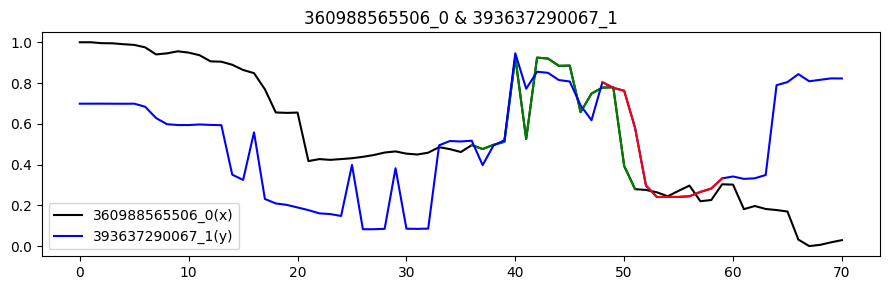

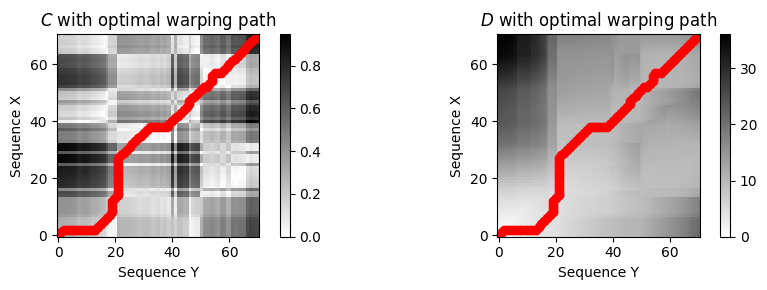

In [102]:
X=np.array([1.        , 0.9999919 , 0.99548453, 0.994862  , 0.99043167, 0.9869619 ,
 0.9750995 , 0.9402808 , 0.9454796 , 0.9556028 , 0.949181  , 0.9364113,
 0.90637213, 0.9045014 , 0.8895958 , 0.8640797 , 0.8484465 , 0.7693185,
 0.6556416 , 0.6535199 , 0.6549956 , 0.4169443 , 0.42680973, 0.42303124,
 0.42681673, 0.43106318, 0.43798056, 0.44668898, 0.4589834 , 0.46441254,
 0.45346364, 0.4493221 , 0.45819226, 0.48524365, 0.47555333, 0.46147788,
 0.49536493, 0.4760388 , 0.49685445, 0.51151955, 0.9259855 , 0.5257448,
 0.9245516 , 0.9201597 , 0.8842835 , 0.8854666 , 0.65698403, 0.748283,
 0.7774229 , 0.7794491 , 0.39343017, 0.27944484, 0.27540657, 0.26390806,
 0.24435784, 0.27109644, 0.2967647 , 0.22019099, 0.2259256 , 0.30317754,
 0.30152503, 0.18110998, 0.19666786, 0.18204272, 0.17684413, 0.16953264,
 0.03191862, 0.        , 0.00613613, 0.01834962, 0.0292047 ])
Y= np.array([0.6986593 , 0.69869804,  0.69874996, 0.698515,   0.6982923,  0.69874513,
 0.68373346, 0.6282983,   0.59811264, 0.5938751,  0.5938002,  0.59670407,
 0.5944471 , 0.59331906,  0.35039264, 0.3246121,  0.55804163, 0.23127802,
 0.20915918, 0.2023267,   0.18947072, 0.17638941, 0.1606205,  0.1570763,
 0.14785919, 0.3978726,   0.08270793, 0.08270261, 0.08475292, 0.38190565,
 0.08527501, 0.08444125,  0.08564918, 0.49436215, 0.515527,   0.51322293,
 0.51701236, 0.39719015,  0.49373284, 0.5191739,  0.94602543, 0.7717719,
 0.8552824 , 0.8500685,   0.8146197,  0.8075678,  0.6902616,  0.6175114,
 0.8040184 , 0.77642566,  0.762146,   0.5801176,  0.29765654, 0.24080075,
 0.24111474, 0.2411217,   0.24452423, 0.26560417, 0.28225434, 0.3322431,
 0.34137142, 0.3297633,   0.33248723, 0.3487272,  0.78930914, 0.80460507,
 0.8436307 , 0.8085375,   0.8157359,  0.8226681,  0.822361  ])

import pickle
import torch
with open("/home/c1l1mo/datasets/ACM_skating/new_test.pkl","rb") as file:
    data = pickle.load(file)

x = data[4]
y = data[25]
x_labeled = (np.where(x["frame_label"]>0)[0])
y_labeled = (np.where(y["frame_label"]>0)[0])[1:]

plt.figure(figsize=(9, 3))
plt.title("360988565506_0 & 393637290067_1")
plt.plot(X, c='k', label='360988565506_0(x)')
plt.plot(x_labeled,X[x_labeled],c="g")
plt.plot(Y, c='b', label='393637290067_1(y)')
plt.plot(y_labeled,Y[y_labeled],c="r")
plt.legend(loc='lower left')
plt.tight_layout()

import libfmp.c3

C = libfmp.c3.compute_cost_matrix(Y,X)
D = libfmp.c3.compute_accumulated_cost_matrix(C)
P = libfmp.c3.compute_optimal_warping_path(D)

P = np.array(P)

plt.figure(figsize=(9, 3))
ax = plt.subplot(1, 2, 1)
libfmp.c3.plot_matrix_with_points(C, P, linestyle='-', 
    ax=[ax], aspect='equal', clim=[0, np.max(C)],
    title='$C$ with optimal warping path', xlabel='Sequence Y', ylabel='Sequence X');

ax = plt.subplot(1, 2, 2)
libfmp.c3.plot_matrix_with_points(D, P, linestyle='-', 
    ax=[ax], aspect='equal', clim=[0, np.max(D)],
    title='$D$ with optimal warping path', xlabel='Sequence Y', ylabel='Sequence X');

plt.tight_layout()

37 46


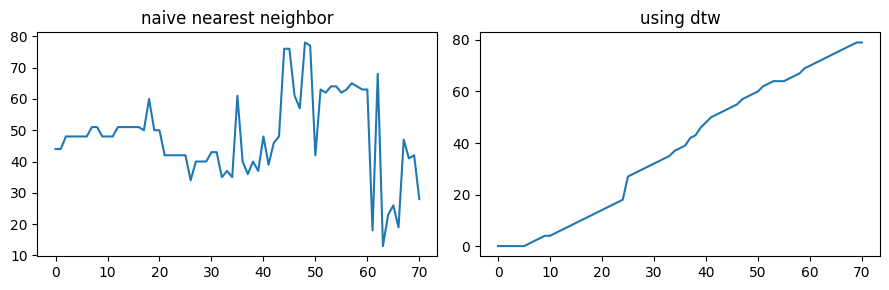

In [76]:
nns= [[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70], 
      [ 0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       37, 38, 39, 42, 43, 46, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60,
       62, 63, 64, 64, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 79]
     ]

ori=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], 
[44, 44, 48, 48, 48, 48, 48, 51, 51, 48, 48, 48, 51, 51, 51, 51, 51, 50, 60, 50, 50, 42, 42, 42, 42, 42, 34, 40, 40, 40, 43, 43, 35, 37, 35, 61, 40, 36, 40, 37, 48, 39, 46, 48, 76, 76, 61, 57, 78, 77, 42, 63, 62, 64, 64, 62, 63, 65, 64, 63, 63, 18, 68, 13, 23, 26, 19, 47, 41, 42, 28]]

plt.figure(figsize=(9, 3))
ax = plt.subplot(1, 2, 1)
ax.set_title("naive nearest neighbor")
plt.plot(ori[0],ori[1])

ax = plt.subplot(1, 2, 2)
ax.set_title("using dtw")
plt.plot(nns[0],nns[1])

print(ori[1][39],nns[1][39])

plt.tight_layout()

In [19]:
import torch
import numpy as np
data = torch.rand(60,60)
data.shape

torch.Size([60, 60])

In [20]:
data = data.detach().cpu().numpy().astype(np.float32)
data.shape

(60, 60)

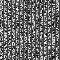

In [22]:
from PIL import Image
img = Image.fromarray(data,'L')
display(img)

(512, 512, 3)


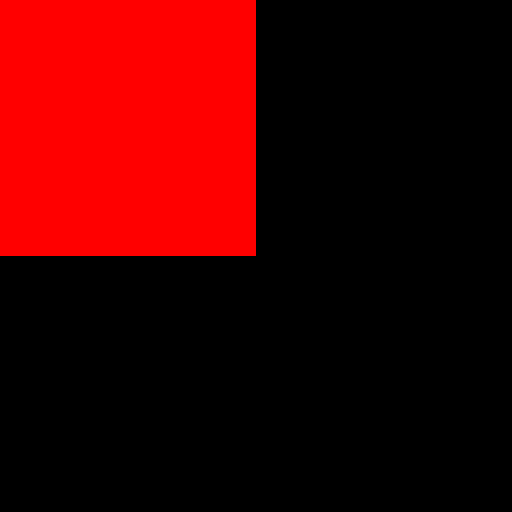

In [17]:
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
print(data.shape)
display(img)

In [1]:
data = [[0.20246695,0.200258   ,0.20056522 ,0.1975198  ,0.19919004],
 [0.20210786, 0.19947147 ,0.2004462 , 0.19880171 ,0.19917277],
 [0.20111735, 0.19972536 ,0.20093688, 0.1992971  ,0.19892336],
 [0.20069174, 0.1997258  ,0.2003168 , 0.19867069 ,0.20059499],
 [0.2007754,  0.19977005, 0.19960913, 0.19939215 ,0.20045334]]

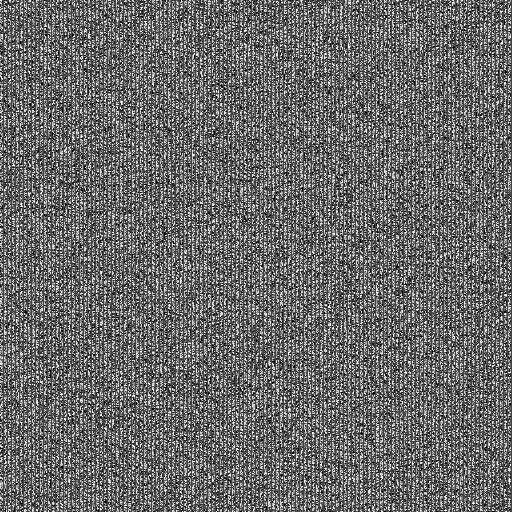

In [7]:
from PIL import Image
import numpy as np
import torch
import cv2
data = data*256
cv2.imwrite('d1.png',data)
img = Image.fromarray(data,'L')
display(img)

In [11]:
%load_ext tensorboard

In [13]:
%tensorboard --logdir "./logs"

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.